**Lab 1**

**Step 1 - Install Library**

In [ ]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=a9182df5e5e3c231c005a220fb64fe1912e43646241fc5039c0f8cd88e434299
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


**Step 2 - Import Library**

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

**Step 3 - Create a Dummy Dataset**
At this step, we will create a dummy dataset followed by selection random query node.

In [ ]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

**Step 4 - Exact NN**
We will compute the nearst data by using brute force approach.

In [ ]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 9.8789 ms


**Step 5 - Nearest Neighbors with ANNOY**
Build an ANNOY model then compare the performance.

In [ ]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1917 ms


**Step 6 - Visualize the NN Result**
In order to compare the NN generated by exact NN and ANNOY, you can simply visualize them using scatterplot (if in 2D). You will find that exact NN and ANNOY may generate different NN but look similar in term of distance.

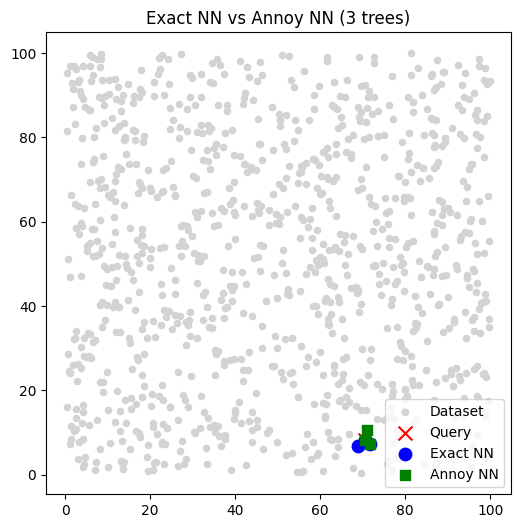

In [ ]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

**Lab 2**

Step 1 - Install FAISS Library



In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 54.4 MB/s eta 0:00:00


Step 2 - Import Libraries

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

Step 3 - Create a Dummy Dataset

In [ ]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

Step 4 - Build Exact NN Model

In [ ]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

Step 5 - Build FAISS Model

In [ ]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

Step 6 - Compare The Performance

In [ ]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0004355907440185547
Waktu IVF+PQ: 0.0001728534698486328


Step 7 - Visualize

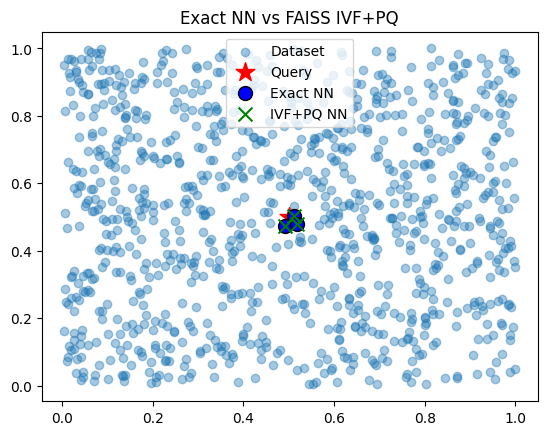

In [ ]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

**Lab 3**


Step 1 - Install HNSW Library

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528142 sha256=8c5a3470957c1575ae35ad9906cb0717b1ef7a27096a62b26be646c4e601f71b
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


Step 2 - Import Libraries

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

Step 3 - Create a Dummy Dataset

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

Step 3 - Build Exact NN Model

In [ ]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.1262669563293457 s


Step 4 - Build HNSW Model

In [ ]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00026988983154296875 s


**Lab 4**

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")


# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 19.9301700592041 detik
Query time: 0.00026679039001464844 detik
Neighbors: [757548, 649749, 195446, 801374, 200072] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.015117645263671875 detik
Query time: 0.005839824676513672 detik
Neighbors: [757548 649749 195446 801374 200072] ...

=== HNSW (hnswlib) ===
Build time: 193.34472727775574 detik
Query time: 0.0002727508544921875 detik
Neighbors: [757548 649749 195446 801374 200072] ...


**Lab 5**

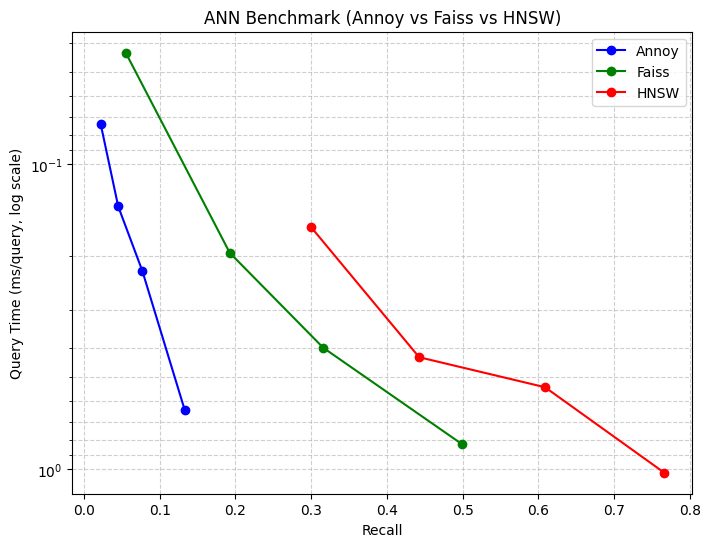

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

**Lab Assignment 1**

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import pandas as pd

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy_benchmark(nb, d, k=10):
    f = d
    index = AnnoyIndex(f, 'euclidean')
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    build_start = time.time()
    for i, v in enumerate(data):
        index.add_item(i, v)
    index.build(10)  # 10 trees
    build_time = time.time() - build_start

    # Prepare for querying (Annoy uses vector directly)
    query_vectors = query

    query_start = time.time()
    # Using a loop for multiple queries
    for q_vec in query_vectors:
        index.get_nns_by_vector(q_vec, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Benchmark FAISS
# -------------------------------
def run_faiss_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2) # nlist=100

    build_start = time.time()
    index.train(data)
    index.add(data)
    build_time = time.time() - build_start

    index.nprobe = 10 # nprobe=10
    query_start = time.time()
    _, I = index.search(query, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time


# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    num_elements = nb
    p = hnswlib.Index(space='l2', dim=d)

    build_start = time.time()
    p.init_index(max_elements=num_elements, ef_construction=200, M=16)
    p.add_items(data)
    build_time = time.time() - build_start

    p.set_ef(50) # ef=50
    query_start = time.time()
    p.knn_query(query, k=k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Run benchmark with different parameters and collect results
# -------------------------------
criteria = {
    "1000/2D": (1000, 2),
    "1000/5D": (1000, 5),
    "1000000/2D": (1000000, 2),
    "1000000/5D": (1000000, 5)
}

results = {}

print("Running benchmarks...")
for label, (nb, d) in criteria.items():
    print(f"\nCriterion: {label}")
    np.random.seed(42) # for reproducibility

    print("  Benchmarking Annoy...")
    annoy_build, annoy_query = run_annoy_benchmark(nb, d)
    print(f"    Annoy Build Time: {annoy_build:.4f} s, Query Time (per query): {annoy_query:.6f} s")


    print("  Benchmarking FAISS...")
    faiss_build, faiss_query = run_faiss_benchmark(nb, d)
    print(f"    FAISS Build Time: {faiss_build:.4f} s, Query Time (per query): {faiss_query:.6f} s")


    print("  Benchmarking HNSW...")
    hnsw_build, hnsw_query = run_hnsw_benchmark(nb, d)
    print(f"    HNSW Build Time: {hnsw_build:.4f} s, Query Time (per query): {hnsw_query:.6f} s")

    results[label] = {
        "Annoy Build Time (s)": annoy_build,
        "Annoy Query Time (s/query)": annoy_query,
        "FAISS Build Time (s)": faiss_build,
        "FAISS Query Time (s/query)": faiss_query,
        "HNSW Build Time (s)": hnsw_build,
        "HNSW Query Time (s/query)": hnsw_query
    }

# -------------------------------
# Display results in a table
# -------------------------------
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results = df_results[['Annoy Build Time (s)', 'Annoy Query Time (s/query)',
                         'FAISS Build Time (s)', 'FAISS Query Time (s/query)',
                         'HNSW Build Time (s)', 'HNSW Query Time (s/query)']]

print("\n--- Performance Comparison Table ---")
display(df_results)

Running benchmarks...

Criterion: 1000/2D
  Benchmarking Annoy...
    Annoy Build Time: 0.0246 s, Query Time (per query): 0.000030 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0017 s, Query Time (per query): 0.000005 s
  Benchmarking HNSW...
    HNSW Build Time: 0.0548 s, Query Time (per query): 0.000010 s

Criterion: 1000/5D
  Benchmarking Annoy...
    Annoy Build Time: 0.0146 s, Query Time (per query): 0.000134 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0355 s, Query Time (per query): 0.000015 s
  Benchmarking HNSW...
    HNSW Build Time: 0.2612 s, Query Time (per query): 0.000062 s

Criterion: 1000000/2D
  Benchmarking Annoy...
    Annoy Build Time: 29.9352 s, Query Time (per query): 0.000062 s
  Benchmarking FAISS...
    FAISS Build Time: 0.1741 s, Query Time (per query): 0.000704 s
  Benchmarking HNSW...
    HNSW Build Time: 119.4284 s, Query Time (per query): 0.000022 s

Criterion: 1000000/5D
  Benchmarking Annoy...
    Annoy Build Time: 19.9720 s, Query Time (per que

,Annoy Build Time (s),Annoy Query Time (s/query),FAISS Build Time (s),FAISS Query Time (s/query),HNSW Build Time (s),HNSW Query Time (s/query)
1000/2D,0.024594,0.000030,0.001721,0.000005,0.054773,0.000010
1000/5D,0.014598,0.000134,0.035532,0.000015,0.261154,0.000062
1000000/2D,29.935247,0.000062,0.174096,0.000704,119.428380,0.000022
1000000/5D,19.972037,0.000063,0.197514,0.000759,186.192028,0.000038


**Lab Assignment 2**

In [ ]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 62.2 MB/s eta 0:00:00


In [ ]:
!pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551810 sha256=09e45166d0ffd5154ec2a9a901c3357fa402b6b9ad0224893c725a3bc0c37288
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528146 sha256=c5a368a125ca5091d4b9ed6dbe6d9867c6b4a334d4ff88595bc4d7452d64aeed
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/pembelajaran_mesin/songs_with_attributes_and_lyrics.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

In [ ]:

# 1. Install dependencies

!pip install faiss-cpu annoy hnswlib scikit-learn pandas numpy


# 2. Import library

import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


# 3. Load dataset

df = pd.read_csv('/content/drive/MyDrive/pembelajaran_mesin/songs_with_attributes_and_lyrics.csv')

# Pilih hanya fitur numerik
df_numeric = df.select_dtypes(include=[np.number])
print(f"Jumlah fitur numerik: {df_numeric.shape[1]}")


# 4. Normalisasi data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric.values)

# Jumlah tetangga terdekat
k = 10

# Pilih satu sampel acak untuk uji pencarian
np.random.seed(42)
query_index = np.random.randint(0, len(X_scaled))
query_vector = X_scaled[query_index].reshape(1, -1)


# 5. Exact Nearest Neighbors (sklearn)

start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_sklearn, idx_sklearn = nn.kneighbors(query_vector)
time_sklearn = time.time() - start


# 6. Annoy

start = time.time()
f = X_scaled.shape[1]
annoy_index = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X_scaled):
    annoy_index.add_item(i, vec)
annoy_index.build(10)
idx_annoy = annoy_index.get_nns_by_vector(query_vector.flatten(), k, include_distances=True)
time_annoy = time.time() - start


# 7. FAISS

start = time.time()
X32 = X_scaled.astype('float32')
index_faiss = faiss.IndexFlatL2(X32.shape[1])
index_faiss.add(X32)
dist_faiss, idx_faiss = index_faiss.search(query_vector.astype('float32'), k)
time_faiss = time.time() - start


# 8. HNSW

start = time.time()
dim = X_scaled.shape[1]
index_hnsw = hnswlib.Index(space='l2', dim=dim)
index_hnsw.init_index(max_elements=len(X_scaled), ef_construction=200, M=16)
index_hnsw.add_items(X_scaled)
index_hnsw.set_ef(50)
idx_hnsw, dist_hnsw = index_hnsw.knn_query(query_vector, k=k)
time_hnsw = time.time() - start


# 9. Bandingkan hasil

print("\n=== Perbandingan Hasil ===")
print(f"Query index: {query_index}")
print("\n1️ Exact NN (sklearn):")
print("Index:", idx_sklearn.flatten())
print(f"Waktu: {time_sklearn:.4f} detik")

print("\n2️ Annoy:")
print("Index:", idx_annoy[0])
print(f"Waktu: {time_annoy:.4f} detik")

print("\n3️ FAISS:")
print("Index:", idx_faiss.flatten())
print(f"Waktu: {time_faiss:.4f} detik")

print("\n4️ HNSW:")
print("Index:", idx_hnsw.flatten())
print(f"Waktu: {time_hnsw:.4f} detik")

# ========================================
# 10. Evaluasi tingkat kemiripan hasil
# ========================================
def overlap(a, b):
    return len(set(a) & set(b)) / len(a)

overlap_annoy = overlap(idx_sklearn.flatten(), idx_annoy[0])
overlap_faiss = overlap(idx_sklearn.flatten(), idx_faiss.flatten())
overlap_hnsw = overlap(idx_sklearn.flatten(), idx_hnsw.flatten())

print("\n=== Tingkat Overlap dengan Exact NN ===")
print(f"Annoy overlap: {overlap_annoy*100:.2f}%")
print(f"FAISS overlap: {overlap_faiss*100:.2f}%")
print(f"HNSW overlap: {overlap_hnsw*100:.2f}%")


Jumlah fitur numerik: 10

=== Perbandingan Hasil ===
Query index: 121958

1️ Exact NN (sklearn):
Index: [121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]
Waktu: 0.0805 detik

2️ Annoy:
Index: [121958, 845348, 443049, 12953, 117008, 474882, 57638, 201246, 845349, 712317]
Waktu: 16.9295 detik

3️ FAISS:
Index: [121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]
Waktu: 0.0824 detik

4️ HNSW:
Index: [121958 845348 443049 651777 722972 443048  12953 903724 287397 117008]
Waktu: 207.1929 detik

=== Tingkat Overlap dengan Exact NN ===
Annoy overlap: 50.00%
FAISS overlap: 100.00%
HNSW overlap: 100.00%
